<a href="https://colab.research.google.com/github/ricardorocha86/Topicos-A/blob/main/Script_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais

In [ ]:
# Carregando dados
dados = read.csv('anuncios.csv')
dados[, 3:4] = scale(dados[,3:4])
dados['Gender'] = ifelse(dados['Gender'] == 'Male', 1, 0)
dados = dados[, 2:5]
head(dados)

,Gender,Age,EstimatedSalary,Purchased
,"<dbl[,1]>",<dbl>,<dbl>,<int>
1,1,-1.7795688,-1.4881825,0
2,1,-0.2532702,-1.4588544,0
3,0,-1.1118131,-0.7843075,0
4,0,-1.0164195,-0.3737137,0
5,1,-1.7795688,0.1835208,0
6,1,-1.0164195,-0.3443855,0


In [ ]:
# Pacote 'caret'
install.packages('caret')
install.packages('e1071')

In [ ]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [ ]:
# Dividindo em teste e treinamento
indice = createDataPartition(y = dados[['Purchased']], p = 7/8, list = FALSE)
treino = dados[ indice, ]
teste  = dados[-indice, ] 

In [ ]:
# Controle do Treinamento
controle <- trainControl(method = "repeatedcv", number = 10, repeats = 3) 

In [ ]:
# Rede Neural 
metodo = 'nnet'

modelLookup(model = metodo)
modelo = train(factor(Purchased) ~., data = treino, method = metodo,
               trControl = controle, tuneLength = 5 )
modelo$resample
modelo

In [ ]:
# Resultado da predição
predicao = predict(modelo, newdata = teste)
cm = confusionMatrix(predicao, factor(teste[['Purchased']]) )
cm


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 32  4
         1  2 12
                                          
               Accuracy : 0.88            
                 95% CI : (0.7569, 0.9547)
    No Information Rate : 0.68            
    P-Value [Acc > NIR] : 0.0009925       
                                          
                  Kappa : 0.7148          
                                          
 Mcnemar's Test P-Value : 0.6830914       
                                          
            Sensitivity : 0.9412          
            Specificity : 0.7500          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.8571          
             Prevalence : 0.6800          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.7200          
      Balanced Accuracy : 0.8456          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
# Grafico da Rede

install.packages('NeuralNetTools')  

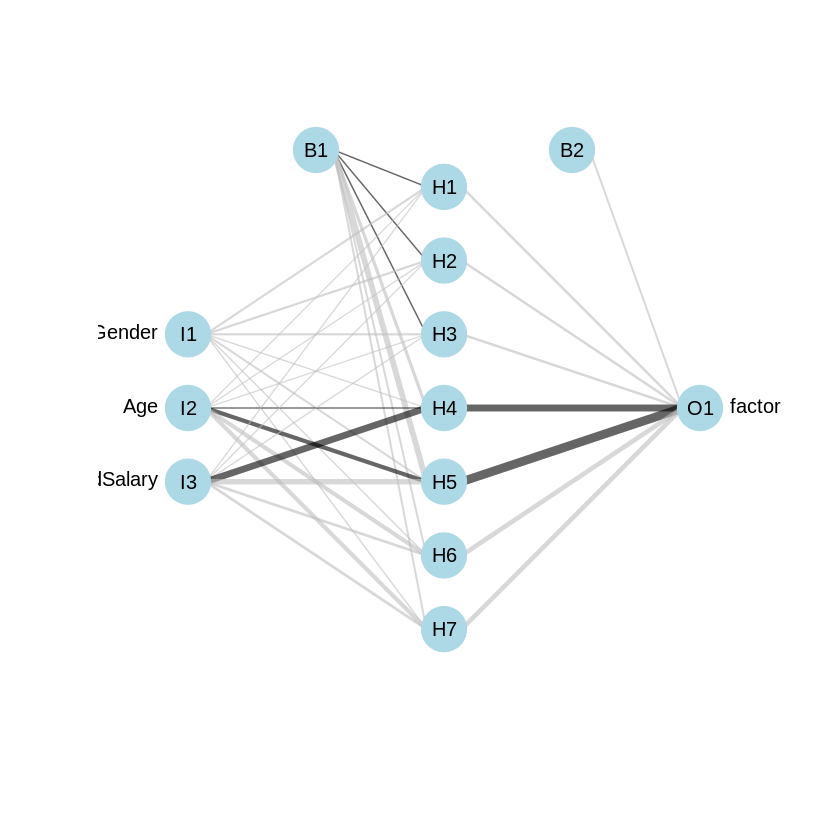

In [ ]:
library(NeuralNetTools)  
plotnet(modelo, alpha = 0.6)

In [ ]:
# Regiao de Decisão
# Gráfico de Região
malha = 200 
treino0 = treino[2:4]
teste0 = teste[2:4]
X1 = seq( min(teste0[, 1]), max(teste0[, 1]), length.out = malha)
X2 = seq( min(teste0[, 2]), max(teste0[, 2]), length.out = malha)
grid = expand.grid(X1, X2)
colnames(grid) = colnames(treino0[, 1:2])

metodo = 'nnet'
modelLookup(model = metodo)
modelo = train(factor(Purchased) ~., data = treino0, method = metodo,
               trControl = controle, tuneLength = 4 )
y_grid = predict(modelo, newdata = grid)



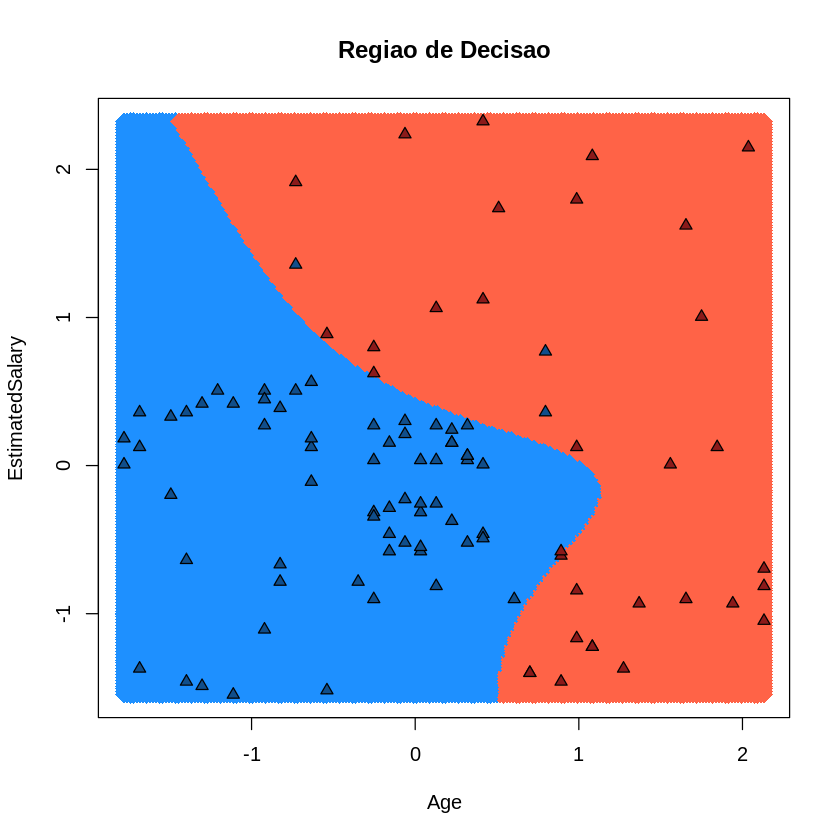

In [ ]:
plot(teste0[, -3], main = 'Regiao de Decisao')
points(grid, pch = 18, col = ifelse(y_grid == 1, 'tomato', 'dodgerblue1'), cex= 2 )
points(teste0, pch = 24, bg = ifelse(teste0[, 3] == 1, 'firebrick4', 'dodgerblue4' ))

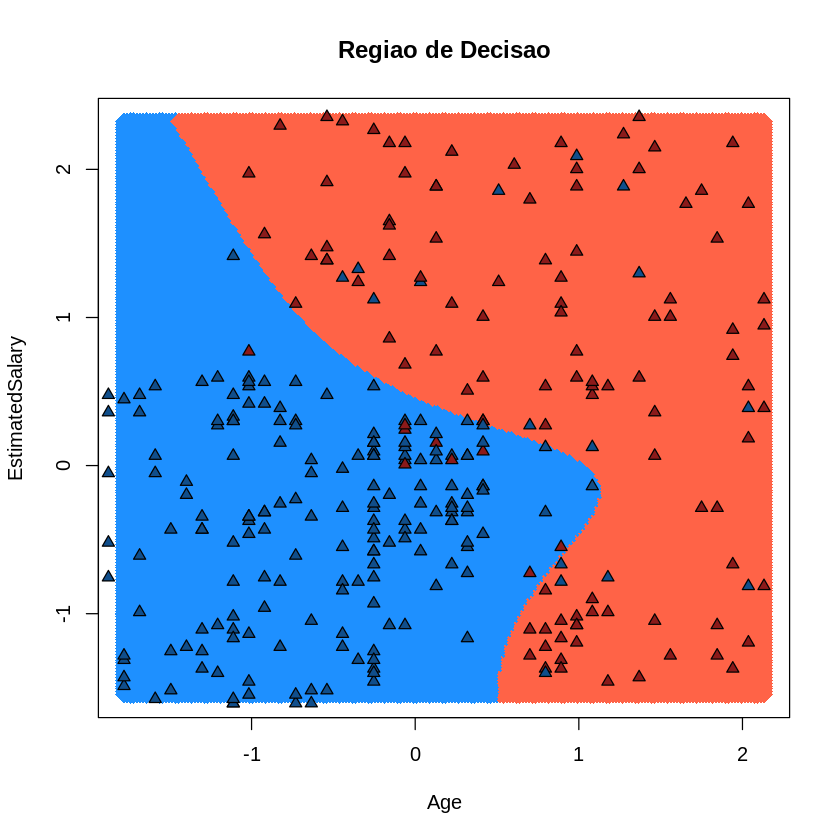

In [ ]:
plot(teste0[, -3], main = 'Regiao de Decisao')
points(grid, pch = 18, col = ifelse(y_grid == 1, 'tomato', 'dodgerblue1'), cex= 2 )
points(treino0, pch = 24, bg = ifelse(treino0[, 3] == 1, 'firebrick4', 'dodgerblue4' ))

---

---

## **Parte B**

### Gradiente Descendente

In [ ]:
install.packages('Deriv')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
require(Deriv)

Loading required package: Deriv



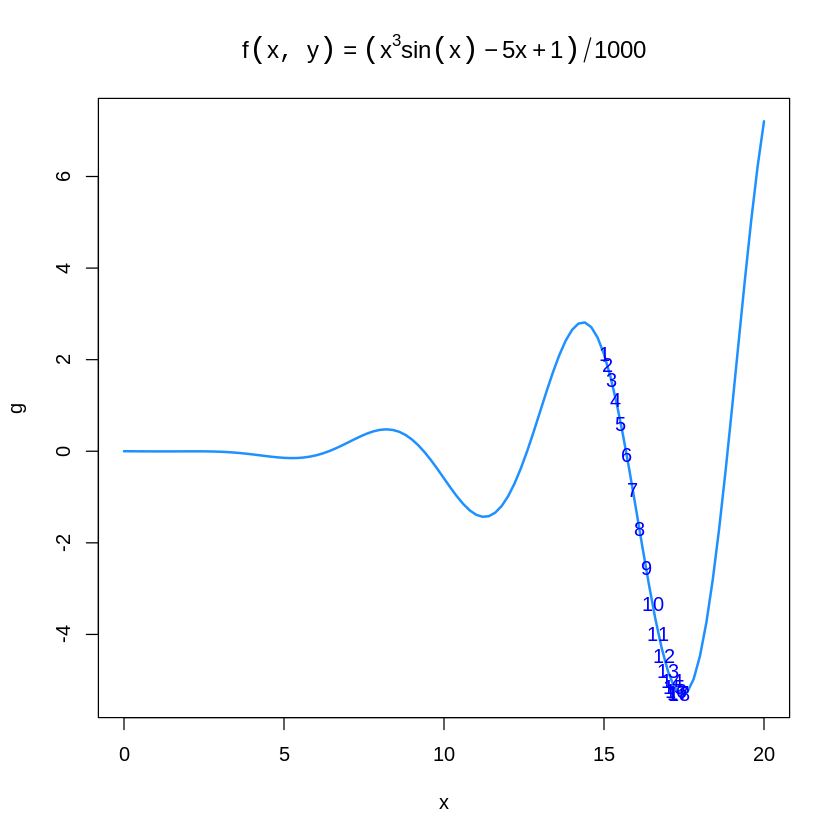

In [ ]:
GradienteDescendente = function(x0, eta = 0.1, L){
    g = function(x) (x^3*sin(x) - 5*x + 1)/1000
    dg = Deriv(g, 'x')
     
    x = x0
    for(i in 2:L){ x[i] = x[i-1] - eta*dg(x[i-1]) }

    plot(g, 0, 20, lwd = 2, col = 'dodgerblue',
         main = expression(f(x,y)==(x^3*sin(x) - 5*x + 1)/1000))
 
    text(x, g(x), 1:L, col = cor, cex = 1)
}

GradienteDescendente(15, eta = 0.05, L = 18)

## Exemplo com duas variáveis

In [ ]:
f = function(x,y) 4*x^2-4*x*y+2*y^2+2

In [ ]:
x = y = seq(-1, 1, length= 15)
z = outer(x, y, f) 

Loading required package: lattice



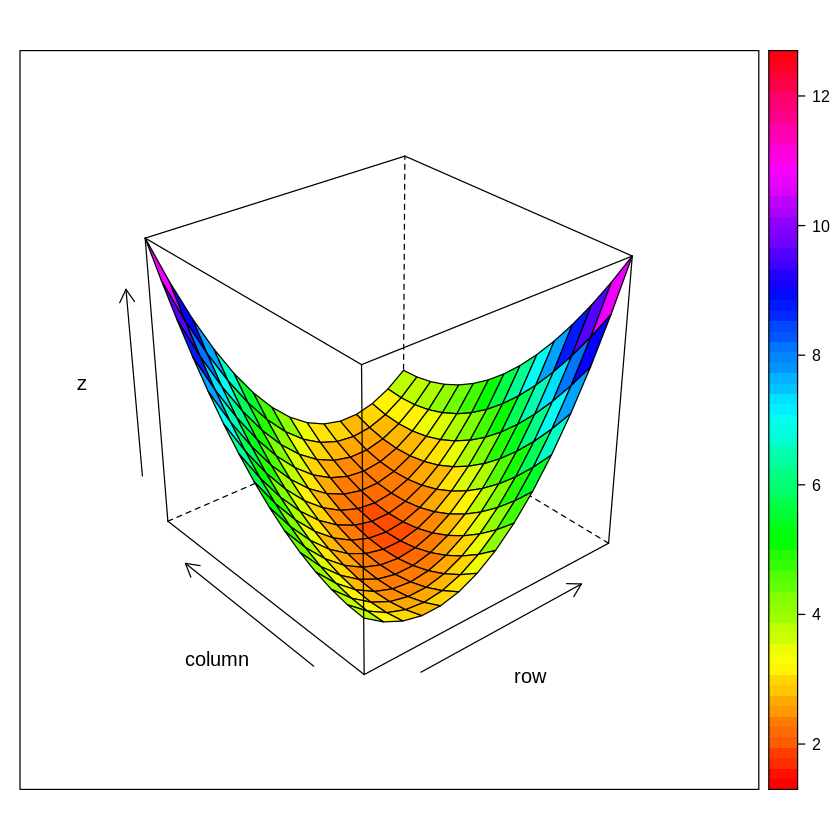

In [ ]:
require(lattice)
wireframe(z, drape=T, col.regions=rainbow(100))

In [ ]:
dfdx = Deriv(f, "x")
dfdy = Deriv(f, "y")

ERROR: ignored

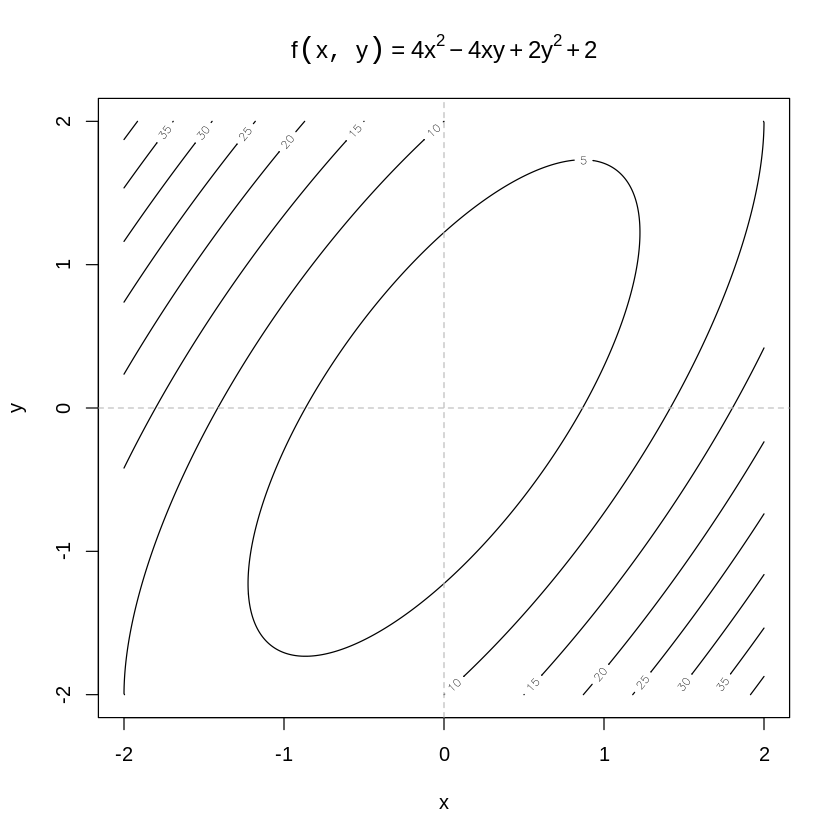

In [ ]:
x = y = seq(-2, 2, len = 500)
z = outer(x, y, f)
contour(x, y, z, xlab = "x", ylab = "y", 
        main = expression(f(x, y) == 4*x^2 - 4*x*y + 2*y^2 + 2))
abline(h = 0, col = 'gray', lty = 'dashed')
abline(v = 0, col = 'gray', lty = 'dashed')
text(x[1,1], x[1,2], '1', cex = 0.75, col = "blue")

[1] -0.07436224 -0.12041244

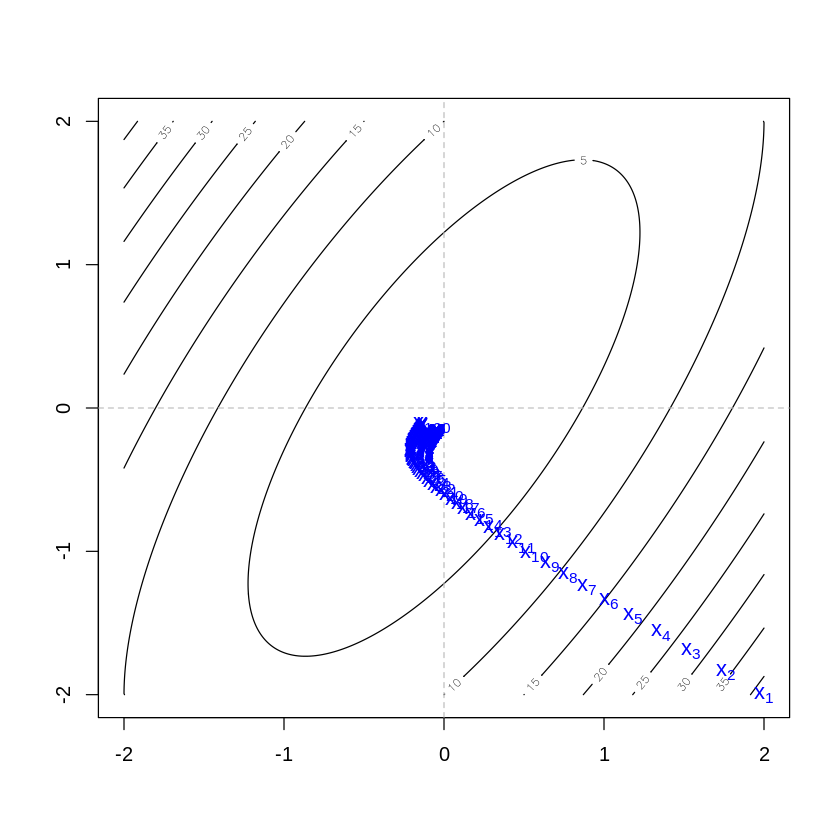

In [ ]:
GradDesc = function(x0, y0, L = 10, eta = 0.1){
    x <- y <- seq(-2, 2, len=500)
    z <- outer(x, y, FUN=f)
    contour(x,y,z, xlab = "x", ylab = "y", main=expression(f(x,y)==4*x^2-4*x*y+2*y^2+2))
    abline(h = 0, col = 'gray', lty = 'dashed')
    abline(v = 0, col = 'gray', lty = 'dashed')
    
    i=1 
    x=matrix(0, nrow=L, ncol=2)
    x[1,1]=x0
    x[1,2]=y0
    text(x[1,1],x[1,2], substitute(x[1], list(i = i)), cex=1.1, col="blue")
    for (i in 2:L) {
        d1=dfdx(x[i-1,1],x[i-1,2])
        d2=dfdy(x[i-1,1],x[i-1,2])
        
        x[i,]=x[i-1,]-eta*c(d1,d2)
        if (i <= L | i==L) {
            text(x[i,1],x[i,2], substitute(x[i],list(i = i)), cex=1.1, col="blue")
        }
    }
    
    return(x[L,])
}


GradDesc(2, -2, L = 100, eta = 0.01) 

## Rede Neural Perceptron

In [ ]:
rm(list = ls())
library(MASS)
n = 500
s = .4
y = c(rep(0,n/2), rep(1,n/2))
a = mvrnorm(n/2, c(0,0), diag(c(s,s))) 
b = mvrnorm(n/2, c(2,2), diag(c(s,s)))


The following object is masked _by_ .GlobalEnv:

    y


The following objects are masked from dataset (pos = 3):

    x1, x2, y




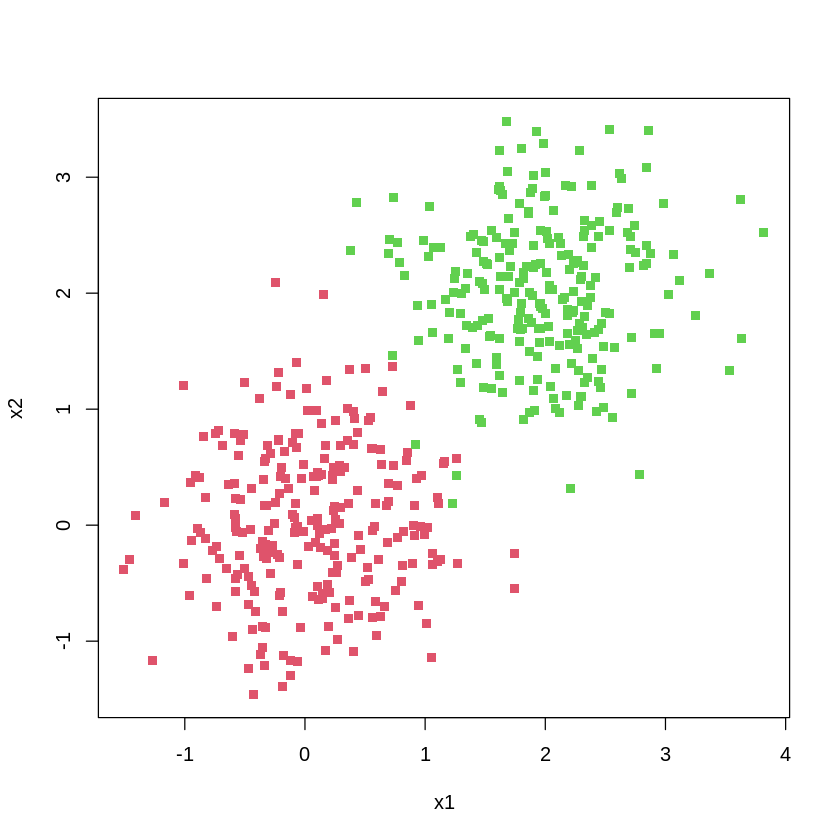

In [ ]:
dataset = as.data.frame(cbind(rbind(a,b), y))
colnames(dataset) = c('x1', 'x2', 'y')
attach(dataset)

plot(x1, x2, col = y+2, pch = 15)

In [ ]:
shuffle = sample(n, n) 
dataset = dataset[shuffle,]
head(dataset)


,x1,x2,y
,<dbl>,<dbl>,<dbl>
451,0.42502438,2.78603099,1
481,2.70279486,2.22185938,1
345,1.81386140,1.69341900,1
34,-0.20832950,0.26971427,0
47,-0.08905721,0.06490257,0
386,1.19823063,1.61094062,1


In [ ]:
n = length(x1)
x0 = rep(1,n)
   
eta=.01

funativ = function(u) ifelse(u>0, 1, 0)


yperceptron = function(w0,w1,w2,x1,x2) { funativ(w0 + w1*x1 + w2*x2) }  

epocas = 200
for(j in 1:epocas){
    if(j==1) w0 = w1 = w2 = 0.1*runif(1)  
    if(j!=1){ w0=w0[n]; w1=w1[n]; w2=w2[n] }
    for(i in 1:(n-1)){
            u = w0[i]*x0[i] + w1[i]*x1[i] + w2[i]*x2[i]

            w0[i+1] = w0[i] + eta*x0[i]*(y[i] - funativ(u) )
            w1[i+1] = w1[i] + eta*x1[i]*(y[i] - funativ(u) )  
            w2[i+1] = w2[i] + eta*x2[i]*(y[i] - funativ(u) )  
    }
}



In [ ]:
 

w0=w0[n]
w1=w1[n]
w2=w2[n]

c(w0,w1,w2)
  
yhat = yperceptron(w0,w1,w2,x1,x2)

table(y,yhat)



[1] -0.09324976  0.07374851  0.04876212

   yhat
y     0   1
  0 238  12
  1   0 250

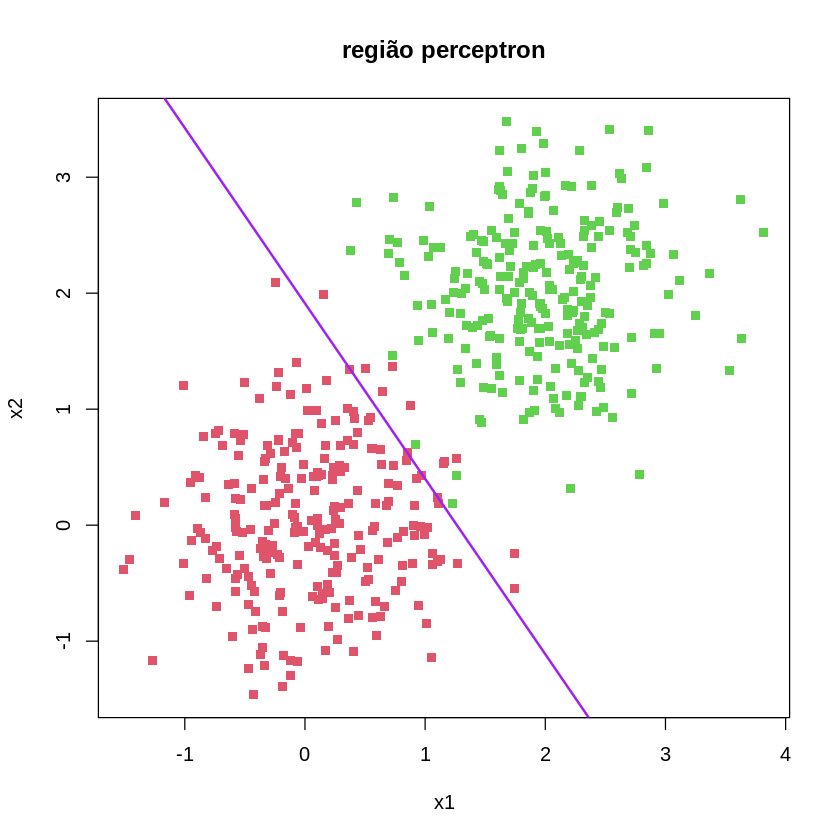

In [ ]:

regiao = function(w0,w1,w2, main = ""){ 
  e1 = seq(-2, 3, 0.01)
  e2 = e1*(-w1/w2) - w0/w2
  
  plot(x1, x2, col = y+2, pch = 15)
  lines(e1, e2, lwd = 2, col = 'purple')
  title(main)
}  

regiao(w0,w1,w2,"região perceptron")



In [ ]:


    eta = .1
 
    e=1 
    ep=0
    while(e > 0){
      ep=ep+1
      if(ep==1) w0 = w1 = w2 = 0.1*runif(1) 
      if(ep!=1){ w0=w0[n]; w1=w1[n]; w2=w2[n] }
      for(i in 1:(n-1)){
        
        u = w0[i]*x0[i] + w1[i]*x1[i] + w2[i]*x2[i]
        
        w0[i+1] = w0[i] + eta*x0[i]*(y[i] - funativ(u) )
        w1[i+1] = w1[i] + eta*x1[i]*(y[i] - funativ(u) )  
        w2[i+1] = w2[i] + eta*x2[i]*(y[i] - funativ(u) )  
        regiao(w0[i+1], w1[i+1], w2[i+1], main = paste('epoca', ep, '- erros', e))

      }

    yhat = yperceptron(w0[n],w1[n],w2[n],x1,x2)
    e = 0#sum(abs(y-yhat))
    #regiao(w0[i+1], w1[i+1], w2[i+1], main = paste('epoca', ep, '- erros', e))
    Sys.sleep(.3) 
    }

    w0=w0[n]
    w1=w1[n]
    w2=w2[n]
    
    c(w0,w1,w2)
    
    yhat = yperceptron(w0,w1,w2,x1,x2)
    
    table(y,yhat) 
    
    
# EXERCICIO: IMPLEMENTAR CRITERIOS DE PARADA NA REDE:
# CRITERIO DE PARADA POR LIMITE DE EPOCAS
# CRITERIO DE PARADA POR POR CONTA DO ERRO NAO DIMINUIR POR UM NUMERO DE EPOCAS
    

